# EDA on MRI Modality prior to Training

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import torch
import torchvision
import torchaudio
import pandas as pd
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%%time
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone2/Data/MRI_full.csv')

data.head(10)

CPU times: user 794 ms, sys: 144 ms, total: 939 ms
Wall time: 2.34 s


,Unnamed: 0,clinical_information,technique,findings,comparison,impression,report_id_x,join,report_id_y,modality,instruction
0,4,Preoperative planning for brain tumor. History...,MRI BRAIN STEALTH W/WO CONTRAST. A total of 17...,There is a heterogeneous left supratentorial a...,Brain MRI dated 11/17/14.,Presurgical planning MRI shows a complex mass ...,RAD_4,4,4.0,MRI,Convert the findings and clinical information ...
1,5,NaN,MRI of the entire spine were obtained with and...,CERVICAL SPINE: The vertebral body heights are...,None.,1. L5 vertebral compression fracture with edem...,RAD_5,5,5.0,MRI,Convert the findings and clinical information ...
2,9,"Female, 61 years old, founded nursing home acu...",MRI of the brain before and after the IV admin...,No evidence of restricted diffusion is seen. P...,CT head 12/30/14,1. No evidence of acute ischemia or other defi...,RAD_9,9,9.0,MRI,Convert the findings and clinical information ...
3,19,"Female, 58 years old, history of ependymoma, e...",MRI of the complete spine before and after the...,Evidence of extensive prior surgery is redemon...,12/3/13; 8/9/11; 8/1/11; 3/23/11; 9/17/10,1. Syringohydromyelia of the cervical spinal c...,RAD_19,19,19.0,MRI,Convert the findings and clinical information ...
4,23,NaN,Multiplanar and multi-sequence MR images of th...,There is high signal in the right corona radia...,CT head dated 12/31/2014.,1. Extensive chronic small vessel ischemic cha...,RAD_23,23,23.0,MRI,Convert the findings and clinical information ...
5,45,"Female, 25 years old, known pituitary adenoma,...",MRI of the pituitary before and after the IV a...,The size and morphology of the pituitary gland...,10/13/12,Stable examination with no definite focal pitu...,RAD_45,45,45.0,MRI,Convert the findings and clinical information ...
6,47,NaN,Multiplanar and multi-sequence MR images of th...,MRI BRAIN: The ventricles and sulci are within...,None.,1. No evidence of acute infarct.2. No evidence...,RAD_47,47,47.0,MRI,Convert the findings and clinical information ...
7,51,"Male, 63 years old, with memory loss. Assess f...",MRI of the brain before and after the IV admin...,Diffusion weighted images are within normal li...,None.,1. No evidence of significant parenchymal atro...,RAD_51,51,51.0,MRI,Convert the findings and clinical information ...
8,117,"AIH with cirrhosis, OLT evaluation",MRI of liver performed with and without IV con...,"ABDOMEN:LIVER, BILIARY TRACT: Cirrhotic liver ...","MRI from October 22, 2014",1. Cirrhotic liver with discrete hepatic segme...,RAD_117,117,117.0,MRI,Convert the findings and clinical information ...
9,165,Prostate cancer,MRI of prostate performed following IV adminis...,PELVIS:PROSTATE:Prostate Size: 5.6 cm in trans...,NaN,1. Areas in prostate base suspicious for malig...,RAD_165,165,165.0,MRI,Convert the findings and clinical information ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33901 entries, 0 to 33900
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            33901 non-null  int64  
 1   clinical_information  27484 non-null  object 
 2   technique             33901 non-null  object 
 3   findings              33901 non-null  object 
 4   comparison            29701 non-null  object 
 5   impression            33901 non-null  object 
 6   report_id_x           33901 non-null  object 
 7   join                  33901 non-null  int64  
 8   report_id_y           33901 non-null  float64
 9   modality              33901 non-null  object 
 10  instruction           33901 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.8+ MB


# Drop Missing Values

In [4]:
# Remove rows with missing values in the relevant columns
data = data.dropna(subset=['clinical_information', 'findings', 'impression'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 27484 entries, 0 to 33900
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            27484 non-null  int64  
 1   clinical_information  27484 non-null  object 
 2   technique             27484 non-null  object 
 3   findings              27484 non-null  object 
 4   comparison            23491 non-null  object 
 5   impression            27484 non-null  object 
 6   report_id_x           27484 non-null  object 
 7   join                  27484 non-null  int64  
 8   report_id_y           27484 non-null  float64
 9   modality              27484 non-null  object 
 10  instruction           27484 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.5+ MB


# Drop Duplicates


In [5]:
data = data.drop_duplicates(subset=['clinical_information'], keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26272 entries, 0 to 33899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            26272 non-null  int64  
 1   clinical_information  26272 non-null  object 
 2   technique             26272 non-null  object 
 3   findings              26272 non-null  object 
 4   comparison            22512 non-null  object 
 5   impression            26272 non-null  object 
 6   report_id_x           26272 non-null  object 
 7   join                  26272 non-null  int64  
 8   report_id_y           26272 non-null  float64
 9   modality              26272 non-null  object 
 10  instruction           26272 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.4+ MB


In [ ]:
%%time
data = data.drop_duplicates(subset=['impression'], keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25177 entries, 0 to 33899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            25177 non-null  int64  
 1   clinical_information  25176 non-null  object 
 2   technique             25177 non-null  object 
 3   findings              25177 non-null  object 
 4   comparison            21597 non-null  object 
 5   impression            25177 non-null  object 
 6   report_id_x           25177 non-null  object 
 7   join                  25177 non-null  int64  
 8   report_id_y           25177 non-null  float64
 9   modality              25177 non-null  object 
 10  instruction           25177 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB
CPU times: user 40.4 ms, sys: 821 µs, total: 41.2 ms
Wall time: 42.2 ms


In [6]:
%%time
data = data.drop_duplicates(subset=['findings'], keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26272 entries, 0 to 33899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            26272 non-null  int64  
 1   clinical_information  26272 non-null  object 
 2   technique             26272 non-null  object 
 3   findings              26272 non-null  object 
 4   comparison            22512 non-null  object 
 5   impression            26272 non-null  object 
 6   report_id_x           26272 non-null  object 
 7   join                  26272 non-null  int64  
 8   report_id_y           26272 non-null  float64
 9   modality              26272 non-null  object 
 10  instruction           26272 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.4+ MB
CPU times: user 54.1 ms, sys: 0 ns, total: 54.1 ms
Wall time: 53.8 ms


# Check 50 random samples of clinical information, findings and impression to check for issues

### **Output removed to protect UChicago medical data**

### **Data seems clean as expected from UChicago Medcine.**

In [ ]:
%%time


# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)


clinical_sample = data['clinical_information'].sample(n=50, random_state=42)

# Print the 50 random samples
clinical_sample

In [ ]:
%%time


# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)


findings_sample = data['findings'].sample(n=50, random_state=42)

# Print the 50 random samples
findings_sample

In [ ]:
%%time


# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)


impression_sample = data['impression'].sample(n=50, random_state=42)

# Print the 50 random samples
impression_sample

# Check maximum token size for each LLM

Tokens: Tokens are the basic units of text that the model processes. They can be words, subwords, or even characters, depending on the tokenization strategy.
Input-Output Pairs: In the context of sequence-to-sequence models (e.g., models used for tasks like translation, summarization, or generating radiology impressions), the maximum token size applies to the combined length of the input and output sequences.

A maximum token size of 131,072 means that each individual input-output pair, when tokenized, cannot exceed 131,072 tokens. This token limit covers both the input (e.g., the combined radiology findings and clinical information) and the output (e.g., the radiology impression).

When fine-tuning or generating text, the total length of tokens across both input and output must fit within this limit. Here’s how it works:

Example Scenarios
Short Input, Short Output

Input: "Patient with cough and fever. Findings show bilateral ground-glass opacities."

Output: "Possible viral pneumonia; recommend follow-up."
T
oken Count: This could be around 15–20 tokens for the input and output combined, far below the 131,072-token limit.

Result: Well within the limit.

In [ ]:
%%time
#base_model="meta-llama/Llama-2-7b"
##base_model= "meta-llama/Llama-2-7b-chat-hf"
#base_model="meta-llama/Llama-3.2-1B"
#base_model="georgesung/llama2_7b_chat_uncensored"
#ft_dataset= "Agile_capstone_foundation_Jaya.json"
#base_model="mistralai/Mistral-7B-v0.1"
base_model= "meta-llama/Llama-3.1-8B"
#base_model = "Falconsai/medical_summarization"
#finetuned_model="llamacapstone1"

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
%%time
from huggingface_hub import login
login(token="")


CPU times: user 967 ms, sys: 52.2 ms, total: 1.02 s
Wall time: 1.74 s


In [ ]:
%%time
from transformers import AutoTokenizer



# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)

# Retrieve the maximum token size
max_token_size = tokenizer.model_max_length

print(f"The predefined maximum token size for the model is: {max_token_size}")


The predefined maximum token size for the model is: 131072
CPU times: user 652 ms, sys: 54.1 ms, total: 706 ms
Wall time: 809 ms


In [ ]:
%%time
from transformers import AutoTokenizer



# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1", trust_remote_code=True)

# Retrieve the maximum token size
max_token_size = tokenizer.model_max_length

print(f"The predefined maximum token size for the model is: {max_token_size}")


tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

The predefined maximum token size for the model is: 1000000000000000019884624838656
CPU times: user 458 ms, sys: 31.5 ms, total: 489 ms
Wall time: 1.94 s


In [ ]:
%%time
from transformers import AutoTokenizer



# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-1B", trust_remote_code=True)

# Retrieve the maximum token size
max_token_size = tokenizer.model_max_length

print(f"The predefined maximum token size for the model is: {max_token_size}")


tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

The predefined maximum token size for the model is: 131072
CPU times: user 1.14 s, sys: 53.8 ms, total: 1.19 s
Wall time: 2.75 s


# Looking at the distribution of impression, findings and clinical information

In [ ]:
%%capture
!pip install pandarallel


In [ ]:


import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

import pandarallel

from pandarallel import pandarallel

pandarallel.initialize(nb_workers=num_processors, use_memory_fs=False)

Available CPUs: 2
INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25176 entries, 0 to 33899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            25176 non-null  int64  
 1   clinical_information  25176 non-null  object 
 2   technique             25176 non-null  object 
 3   findings              25176 non-null  object 
 4   comparison            21596 non-null  object 
 5   impression            25176 non-null  object 
 6   report_id_x           25176 non-null  object 
 7   join                  25176 non-null  int64  
 8   report_id_y           25176 non-null  float64
 9   modality              25176 non-null  object 
 10  instruction           25176 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


When performing exploratory data analysis (EDA) for clinical information, radiology findings, and radiology impressions, cleaning the dataset in a way that removes numbers, special characters, or standardizes content excessively can negatively impact the analysis and model fine-tuning due to the following reasons:

### 1. **Loss of Clinical Relevance**
   - **Numbers**: Quantitative values (e.g., measurements like "5 mm," "120 bpm") are critical in clinical contexts. Removing them can strip the data of essential details necessary for understanding patient conditions or findings.
   - **Special Characters**: Symbols like “<,” “>,” “±,” or units of measurement (e.g., "cm³") often carry crucial information. For instance, "EF < 35%" indicates an important threshold in cardiology.
   - **Standardization**: Over-standardizing (e.g., forcing uniform phrasing) can result in loss of nuances specific to medical language, such as "hypointense lesion" versus "hyperintense lesion," which describe different findings.

### 2. **Impact on Model Understanding**
   - Clinical and radiological text often contains domain-specific jargon, abbreviations, and conventions. Removing or altering this content can hinder a model's ability to learn domain-specific language patterns and associations.
   - For example, in radiology reports, a term like "grade 2/4" or "1-2 cm" has specific clinical implications. Removing such expressions disrupts the semantic context.

### 3. **Hindrance to Contextual Analysis**
   - Special characters and formatting often provide context and structure. For instance, parentheses are used for clarifications (e.g., "lesion (likely benign)"), and colons or commas delimit sections within findings (e.g., "Heart: Normal. Lungs: Mild consolidation").
   - Removing these markers makes it harder to interpret the text systematically or preserve the relationships between entities.

### 4. **Impact on Training Quality**
   - For models fine-tuned on clinical text, the goal is to emulate the patterns, precision, and language used by clinicians. Over-cleaning distorts the input text and reduces its similarity to the domain-specific language the model must learn.
   - A model trained on sanitized data may perform poorly when faced with real-world clinical texts containing numbers, abbreviations, and special characters.

### 5. **Loss of Granularity**
   - Clinical findings are often granular and nuanced. Over-cleaning risks homogenizing the data, leading to a loss of specificity in patterns of language or associations critical for downstream tasks.

By maintaining the integrity of the dataset, you ensure the data remains meaningful for both EDA and subsequent modeling, preserving the unique characteristics of clinical language.

# Code if I were to do some cleaning in future work--won't be cleaning for reasons explained above.

In [ ]:
%%time
def clean(doc):
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import string
    import re
    # Download the tokenizer data if it's not already downloaded
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    # Initialize stopwords, punctuation, and lemmatizer
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()

    # Remove URLs, emails, phone numbers, and other patterns using regular expressions
    doc = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', doc)  # Remove URLs
    doc = re.sub(r'\S+@\S+', '', doc)  # Remove emails
    doc = re.sub(r'\b\d{1,4}[-.\s]?\(?(\d{3})\)?[-.\s]?(\d{3})[-.\s]?(\d{4})\b', '', doc)  # Remove phone numbers

    # Remove emojis using regex pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    doc = emoji_pattern.sub('', doc)  # Remove emojis

    # Convert the entire document to lowercase and split into tokens
    # Do not filter out numeric words, only remove stopwords and punctuation
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])

    # Lemmatization: Lemmatize each word and filter out long words (more than 20 characters)
    normalized = [lemma.lemmatize(word) for word in stop_free.split() if len(word) < 21]

    return normalized


# Apply the cleaning function to the 'impression' column using parallel_apply
data['tokenized_impression'] = data['impression'].parallel_apply(clean)


CPU times: user 275 ms, sys: 196 ms, total: 471 ms
Wall time: 21.2 s


In [ ]:
def clean(doc):
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import string
    import re

    # Download necessary NLTK data
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    # Initialize stopwords, punctuation, and lemmatizer
    stop = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()

    # Remove URLs, emails, and phone numbers
    doc = re.sub(r'(?:\@|http?\://|https?\://|www)\S+', '', doc)
    doc = re.sub(r'\S+@\S+', '', doc)
    doc = re.sub(r'\b\d{1,4}[-.\s]?\(?(\d{3})\)?[-.\s]?(\d{3})[-.\s]?(\d{4})\b', '', doc)

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    doc = emoji_pattern.sub('', doc)

    # Lowercase, remove stopwords, and retain numerical values selectively
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop or i.isdigit()])

    # Lemmatize and filter long words
    normalized = " ".join([lemma.lemmatize(word) for word in stop_free.split() if len(word) < 21])

    return normalized

# Apply to clinical data columns
data['cleaned_impression'] = data['impression'].parallel_apply(clean)
#data['cleaned_clinical_information'] = data['clinical_information'].parallel_apply(clean)


In [ ]:
#data['impression_word_count'] = data['tokenized_impression'].apply(len)
(data['cleaned_impression'].apply(len)).describe()


,cleaned_impression
count,25177.000000
mean,253.146642
std,182.049395
min,2.000000
25%,121.000000
50%,208.000000
75%,335.000000
max,2140.000000


In [ ]:
# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Display 5 random samples from the 'cleaned_impression' column with a fixed random state
data['cleaned_impression'].sample(5, random_state=42)

#removing stop words like no is problematic as it change No evidence of intracranial hemorrhage to evidence intracranial hemorrhage


In [ ]:
# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Display 5 random samples from the 'cleaned_impression' column with a fixed random state
data['impression'].sample(5, random_state=42)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25177 entries, 0 to 33899
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            25177 non-null  int64  
 1   clinical_information  25176 non-null  object 
 2   technique             25177 non-null  object 
 3   findings              25177 non-null  object 
 4   comparison            21597 non-null  object 
 5   impression            25177 non-null  object 
 6   report_id_x           25177 non-null  object 
 7   join                  25177 non-null  int64  
 8   report_id_y           25177 non-null  float64
 9   modality              25177 non-null  object 
 10  instruction           25177 non-null  object 
 11  tokenized_impression  25177 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


In [ ]:
%%time
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download the 'punkt' tokenizer data if it's not already downloaded
nltk.download('punkt', quiet=True)

# Calculate word count, sentence count, and character length for each tokenized impression
data['impression_word_count'] = data['tokenized_impression'].apply(len)
data['impression_sentence_count'] = data['impression'].apply(lambda x: len(sent_tokenize(x)))
data['impression_length'] = data['impression'].apply(len)

# Summary statistics for each metric
print("\nCharacter Length Summary:")
print(data['impression_length'].describe())

print("\nWord Count Summary:")
print(data['impression_word_count'].describe())

print("\nSentence Count Summary:")
print(data['impression_sentence_count'].describe())

# Visualize the distribution of word count, sentence count, and character length

# Histogram of word counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_word_count', bins=50, kde=True)
plt.title('Distribution of Impression Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of sentence counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_sentence_count', bins=50, kde=True)
plt.title('Distribution of Impression Sentence Counts')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of character lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_length', bins=50, kde=True)
plt.title('Distribution of Impression Lengths (Characters)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

# Assuming 'modality' column exists in the data
# Calculate average metrics by modality
modality_avg_word_count = data.groupby('modality')['impression_word_count'].mean()
modality_avg_sentence_count = data.groupby('modality')['impression_sentence_count'].mean()
modality_avg_char_length = data.groupby('modality')['impression_length'].mean()

print("\nAverage Word Count by Modality:")
print(modality_avg_word_count)

print("\nAverage Sentence Count by Modality:")
print(modality_avg_sentence_count)

print("\nAverage Character Length by Modality:")
print(modality_avg_char_length)

# Box plots to compare distribution by modality

# Box plot of word count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_word_count')
plt.title('Distribution of Impression Word Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of sentence count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_sentence_count')
plt.title('Distribution of Impression Sentence Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Sentence Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of character length by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_length')
plt.title('Distribution of Impression Lengths by Modality (Characters)')
plt.xlabel('Modality')
plt.ylabel('Character Length')
plt.xticks(rotation=45)
plt.show()


# Non-cleaned Data--used in fine-tuning


Character Length Summary:
count    25177.000000
mean       310.648568
std        227.910635
min          3.000000
25%        146.000000
50%        254.000000
75%        412.000000
max       2667.000000
Name: impression_length, dtype: float64

Word Count Summary:
count    25177.000000
mean        48.976645
std         36.709495
min          1.000000
25%         23.000000
50%         39.000000
75%         65.000000
max        430.000000
Name: impression_word_count, dtype: float64

Sentence Count Summary:
count    25177.000000
mean         3.134925
std          2.463401
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         26.000000
Name: impression_sentence_count, dtype: float64


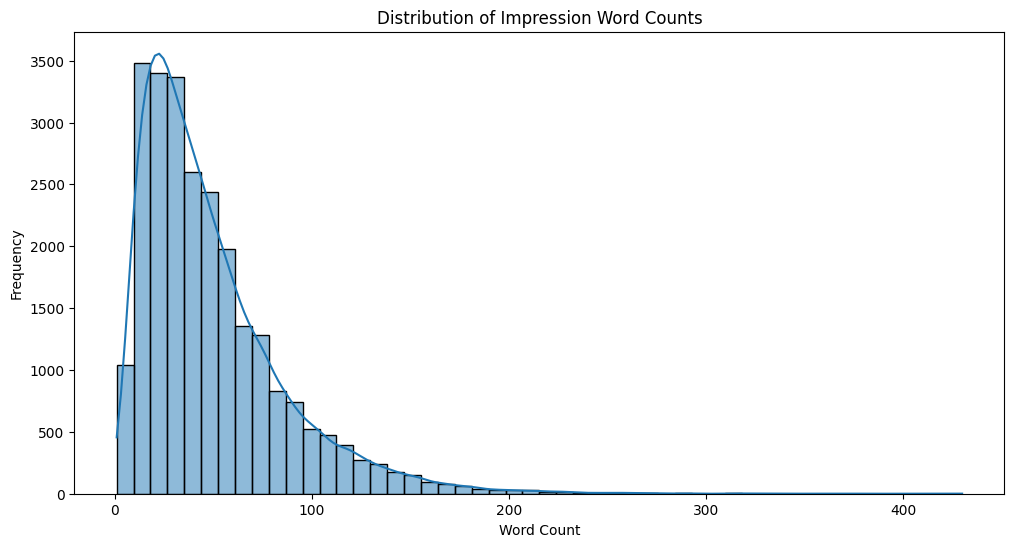

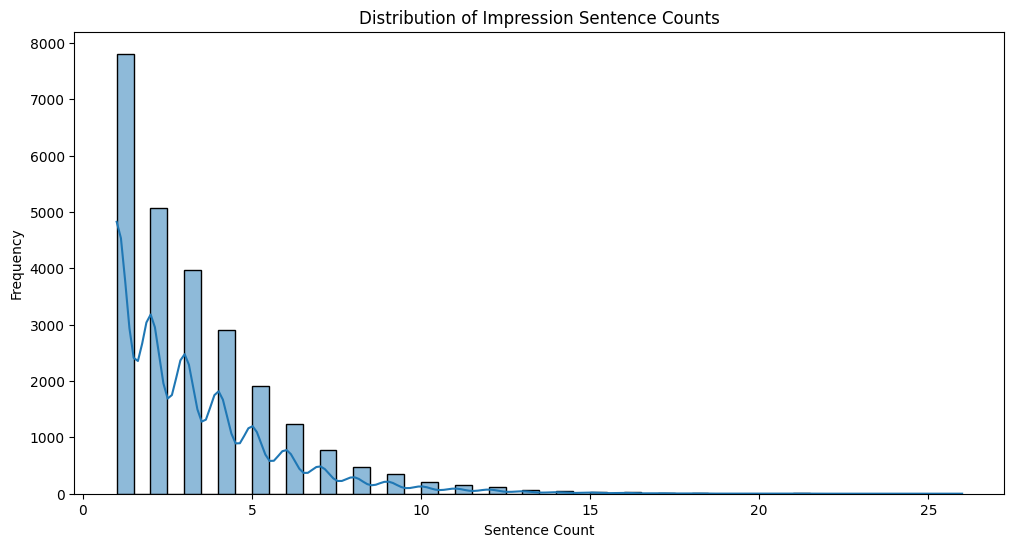

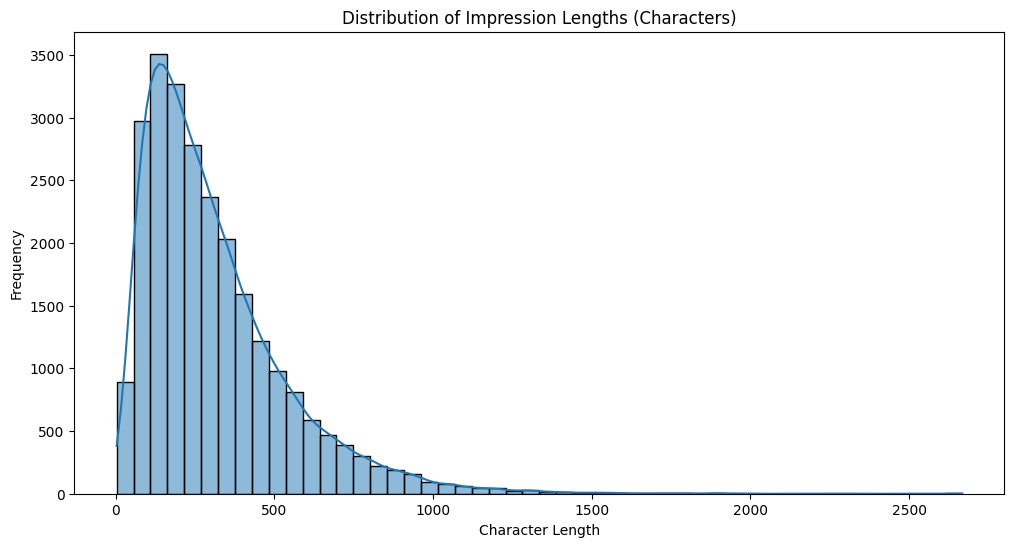


Average Word Count by Modality:
modality
MRI    48.976645
Name: impression_word_count, dtype: float64

Average Sentence Count by Modality:
modality
MRI    3.134925
Name: impression_sentence_count, dtype: float64

Average Character Length by Modality:
modality
MRI    310.648568
Name: impression_length, dtype: float64


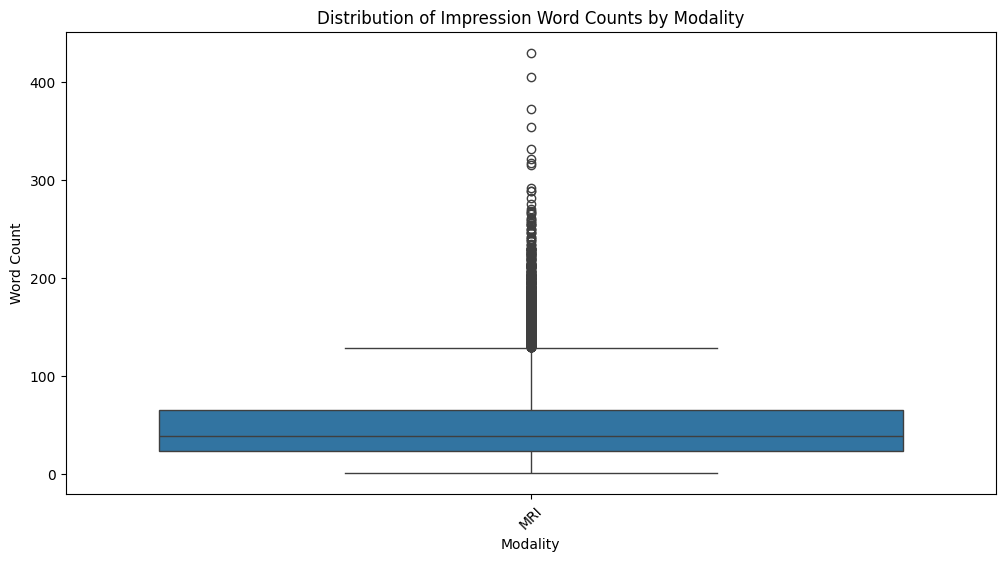

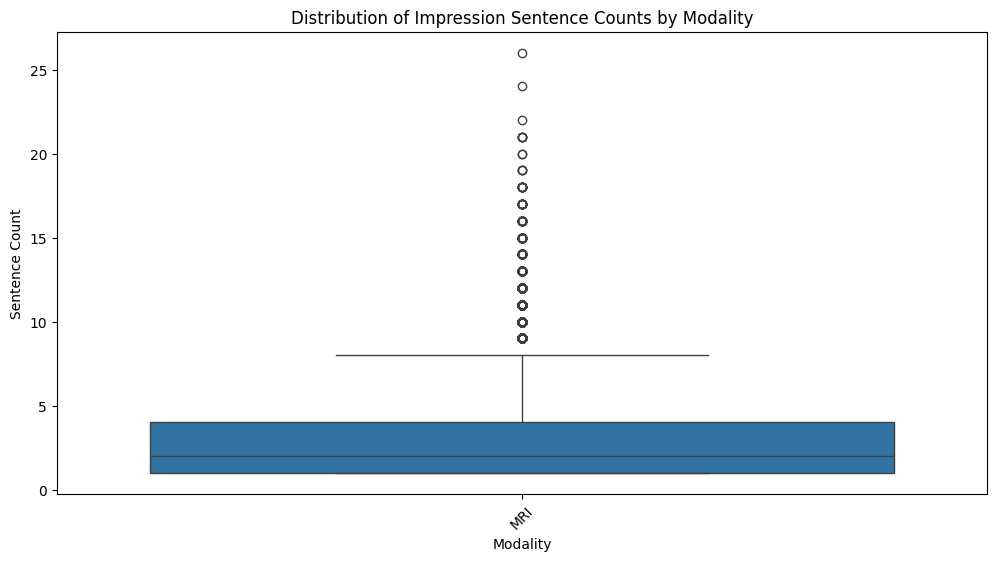

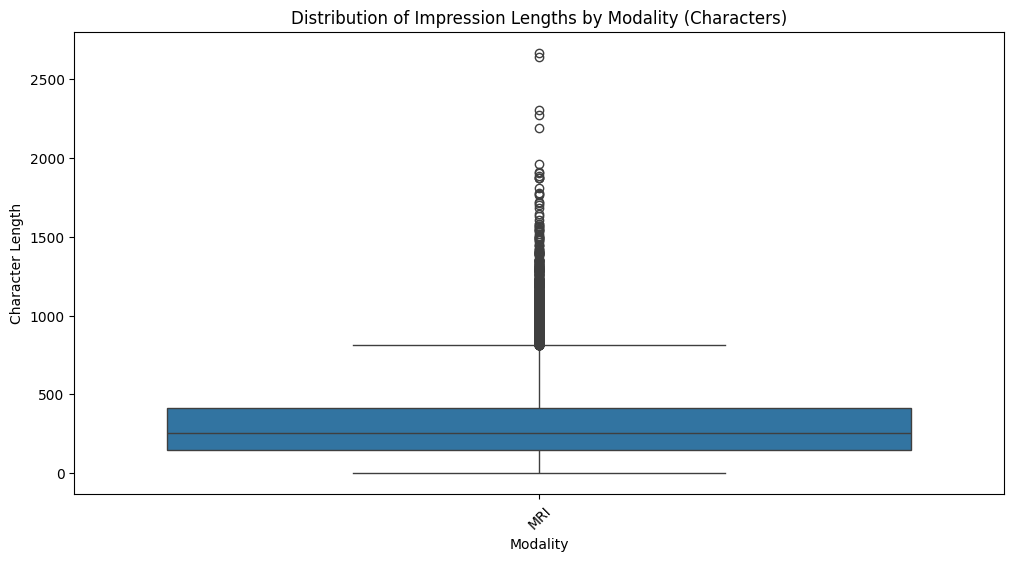

CPU times: user 19.6 s, sys: 749 ms, total: 20.3 s
Wall time: 21.2 s


In [ ]:
%%time
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download the 'punkt' tokenizer data if it's not already downloaded
nltk.download('punkt', quiet=True)

# Calculate the word count, sentence count, and character length of each impression
data['impression_word_count'] = data['impression'].apply(lambda x: len(word_tokenize(x)))
data['impression_sentence_count'] = data['impression'].apply(lambda x: len(sent_tokenize(x)))
data['impression_length'] = data['impression'].str.len()

# Summary statistics for each metric
print("\nCharacter Length Summary:")
print(data['impression_length'].describe())

print("\nWord Count Summary:")
print(data['impression_word_count'].describe())

print("\nSentence Count Summary:")
print(data['impression_sentence_count'].describe())

# Visualize the distribution of word count, sentence count, and character length

# Histogram of word counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_word_count', bins=50, kde=True)
plt.title('Distribution of Impression Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of sentence counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_sentence_count', bins=50, kde=True)
plt.title('Distribution of Impression Sentence Counts')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of character lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='impression_length', bins=50, kde=True)
plt.title('Distribution of Impression Lengths (Characters)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

# Group by modality and calculate mean lengths
modality_avg_word_count = data.groupby('modality')['impression_word_count'].mean().sort_values(ascending=False)
modality_avg_sentence_count = data.groupby('modality')['impression_sentence_count'].mean().sort_values(ascending=False)
modality_avg_char_length = data.groupby('modality')['impression_length'].mean().sort_values(ascending=False)

print("\nAverage Word Count by Modality:")
print(modality_avg_word_count)

print("\nAverage Sentence Count by Modality:")
print(modality_avg_sentence_count)

print("\nAverage Character Length by Modality:")
print(modality_avg_char_length)

# Box plots to compare distribution by modality

# Box plot of word count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_word_count')
plt.title('Distribution of Impression Word Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of sentence count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_sentence_count')
plt.title('Distribution of Impression Sentence Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Sentence Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of character length by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='impression_length')
plt.title('Distribution of Impression Lengths by Modality (Characters)')
plt.xlabel('Modality')
plt.ylabel('Character Length')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25176 entries, 0 to 33899
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 25176 non-null  int64  
 1   clinical_information       25176 non-null  object 
 2   technique                  25176 non-null  object 
 3   findings                   25176 non-null  object 
 4   comparison                 21596 non-null  object 
 5   impression                 25176 non-null  object 
 6   report_id_x                25176 non-null  object 
 7   join                       25176 non-null  int64  
 8   report_id_y                25176 non-null  float64
 9   modality                   25176 non-null  object 
 10  instruction                25176 non-null  object 
 11  impression_word_count      25176 non-null  int64  
 12  impression_sentence_count  25176 non-null  int64  
 13  impression_length          25176 non-null  int64  


# Checking outliers
**Output removed to protect Uchicago data**

**Outliers are legtimate information with no issues; hence, the data will be kept for training**

In [ ]:
# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Filter impressions with token count of 300 or more
long_impressions = data[data['impression'].apply(len) >= 300]

# Display 5 random samples from the filtered DataFrame
sample_long_impressions = long_impressions.sample(n=5, random_state=2)  # Set random_state for reproducibility

# Show the tokenized impressions of the sampled rows
sample_long_impressions['tokenized_impression']


In [ ]:

# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Filter impressions with character length of 1000 or more
long_impressions = data[data['impression'].apply(len) >= 300]

# Display 10 samples from the filtered DataFrame
sample_long_impressions = long_impressions.sample(n=5, random_state=2)  # Set random_state for reproducibility
sample_long_impressions['impression']


In [ ]:

# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Filter impressions with character length of 1000 or more
long_impressions = data[data['impression_word_count'] >= 300]

# Display 10 samples from the filtered DataFrame
sample_long_impressions = long_impressions.sample(n=5, random_state=2)  # Set random_state for reproducibility
sample_long_impressions['impression']


In [ ]:


# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Filter impressions with character length of 1000 or more
long_impressions = data[data['impression_length'] >= 1000]

# Display 10 samples from the filtered DataFrame
sample_long_impressions = long_impressions.sample(n=10, random_state=1)  # Set random_state for reproducibility
sample_long_impressions['impression']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25176 entries, 0 to 33899
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 25176 non-null  int64  
 1   clinical_information       25176 non-null  object 
 2   technique                  25176 non-null  object 
 3   findings                   25176 non-null  object 
 4   comparison                 21596 non-null  object 
 5   impression                 25176 non-null  object 
 6   report_id_x                25176 non-null  object 
 7   join                       25176 non-null  int64  
 8   report_id_y                25176 non-null  float64
 9   modality                   25176 non-null  object 
 10  instruction                25176 non-null  object 
 11  impression_word_count      25176 non-null  int64  
 12  impression_sentence_count  25176 non-null  int64  
 13  impression_length          25176 non-null  int64  


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Findings Character Length Summary:
count    26272.000000
mean      1080.002360
std        616.044673
min          5.000000
25%        648.000000
50%        929.000000
75%       1340.000000
max       5945.000000
Name: findings_length, dtype: float64

Findings Word Count Summary:
count    26272.000000
mean       173.685825
std        101.497872
min          1.000000
25%        104.000000
50%        148.000000
75%        214.000000
max       1011.000000
Name: findings_word_count, dtype: float64

Findings Sentence Count Summary:
count    26272.000000
mean         8.791565
std          5.366953
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         61.000000
Name: findings_sentence_count, dtype: float64


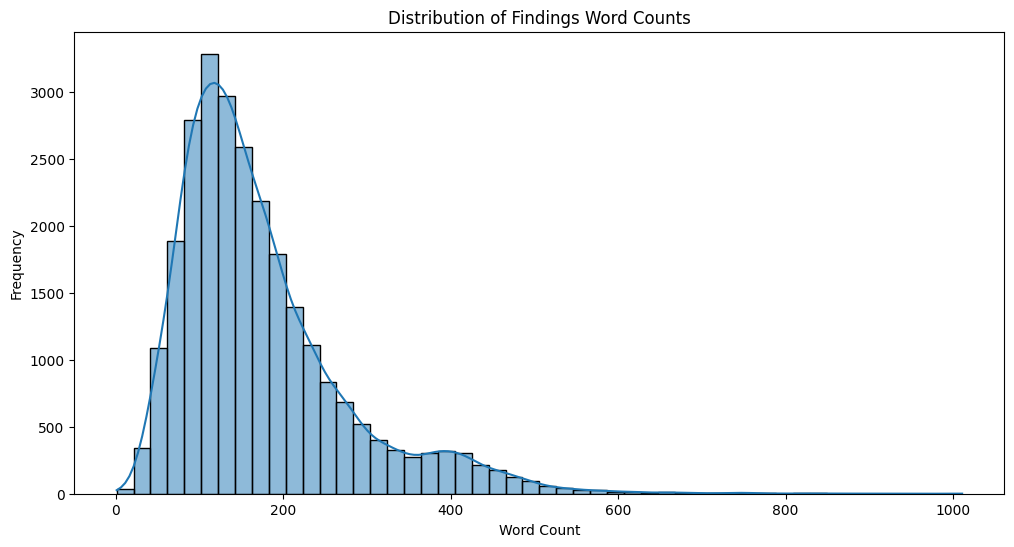

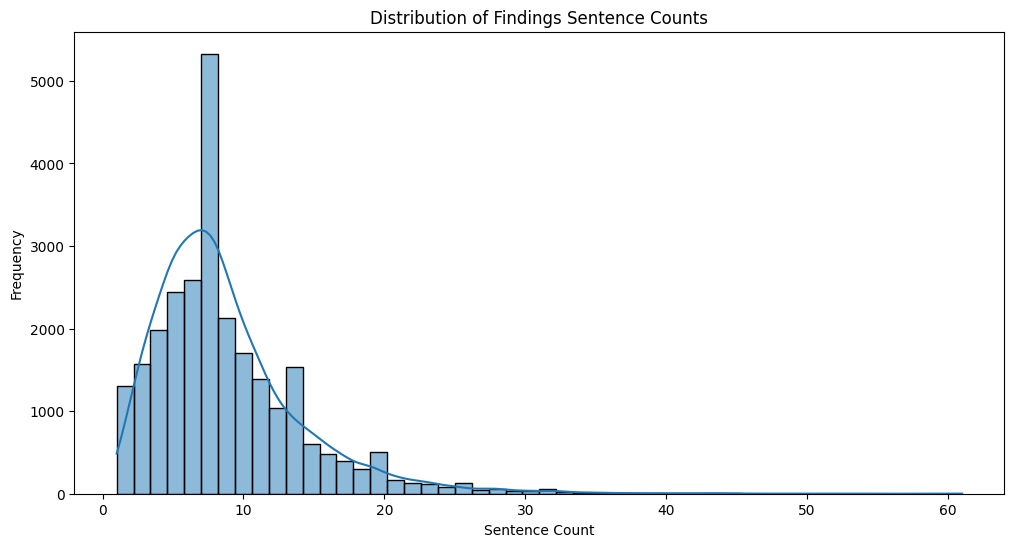

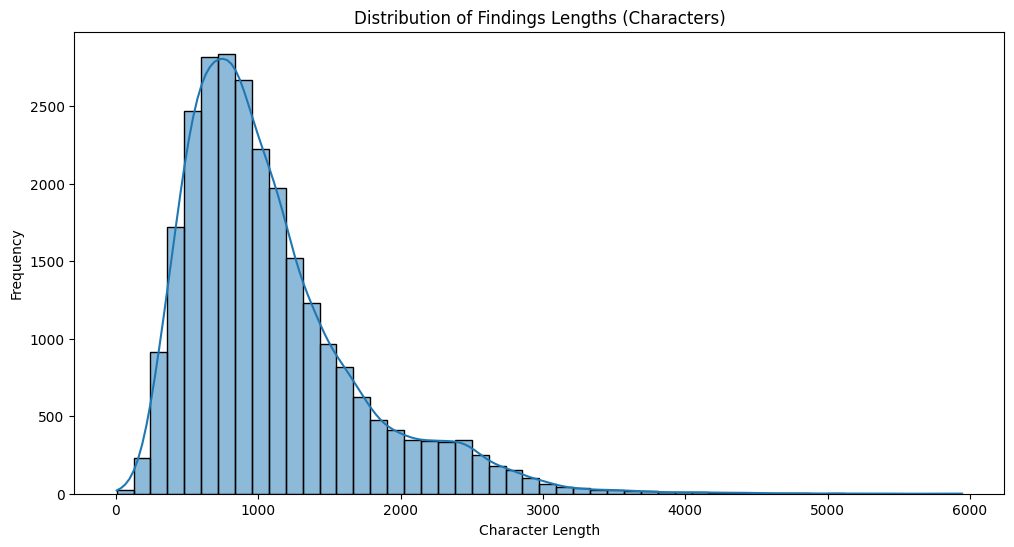


Average Findings Word Count by Modality:
modality
MRI    173.685825
Name: findings_word_count, dtype: float64

Average Findings Sentence Count by Modality:
modality
MRI    8.791565
Name: findings_sentence_count, dtype: float64

Average Findings Character Length by Modality:
modality
MRI    1080.00236
Name: findings_length, dtype: float64


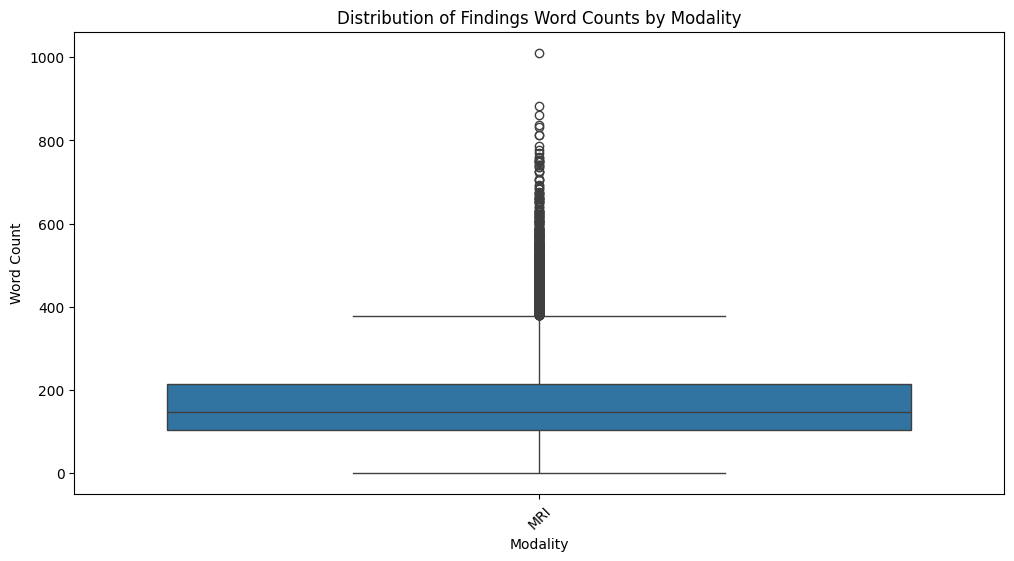

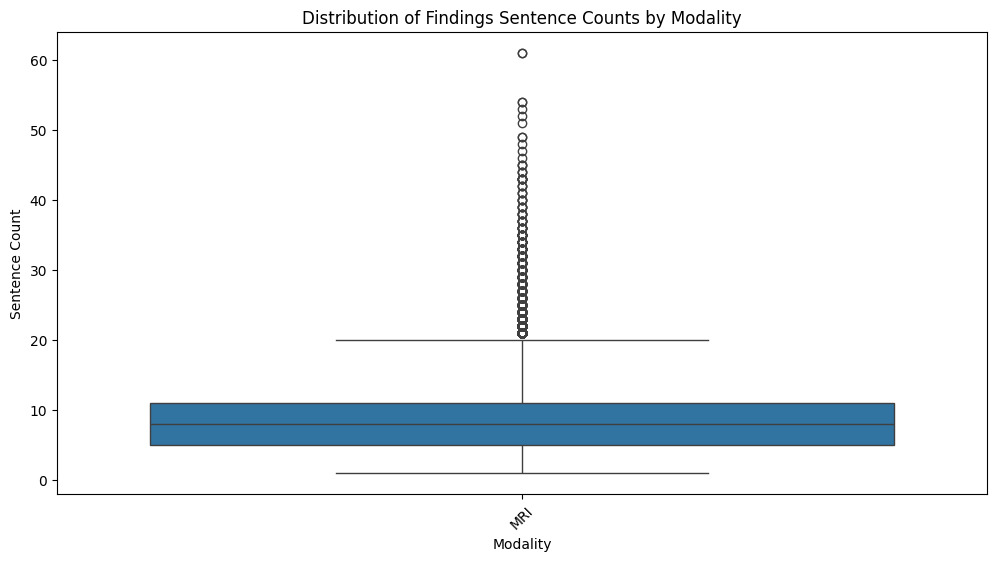

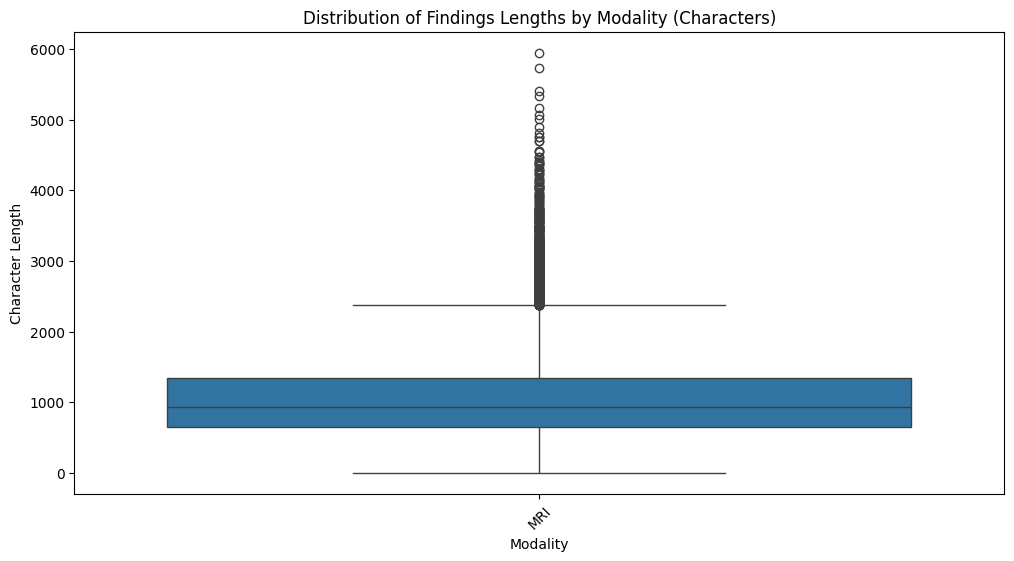

CPU times: user 53.6 s, sys: 576 ms, total: 54.2 s
Wall time: 58 s


In [8]:
%%time
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab')

# Calculate word count, sentence count, and character length for each finding
data['findings_word_count'] = data['findings'].apply(lambda x: len(word_tokenize(x)))
data['findings_sentence_count'] = data['findings'].apply(lambda x: len(sent_tokenize(x)))
data['findings_length'] = data['findings'].str.len()

# Summary statistics for each metric
print("\nFindings Character Length Summary:")
print(data['findings_length'].describe())

print("\nFindings Word Count Summary:")
print(data['findings_word_count'].describe())

print("\nFindings Sentence Count Summary:")
print(data['findings_sentence_count'].describe())

# Visualize the distribution of word count, sentence count, and character length for findings

# Histogram of word counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='findings_word_count', bins=50, kde=True)
plt.title('Distribution of Findings Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of sentence counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='findings_sentence_count', bins=50, kde=True)
plt.title('Distribution of Findings Sentence Counts')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of character lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='findings_length', bins=50, kde=True)
plt.title('Distribution of Findings Lengths (Characters)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

# Group by modality and calculate mean lengths for findings
modality_avg_word_count = data.groupby('modality')['findings_word_count'].mean().sort_values(ascending=False)
modality_avg_sentence_count = data.groupby('modality')['findings_sentence_count'].mean().sort_values(ascending=False)
modality_avg_char_length = data.groupby('modality')['findings_length'].mean().sort_values(ascending=False)

print("\nAverage Findings Word Count by Modality:")
print(modality_avg_word_count)

print("\nAverage Findings Sentence Count by Modality:")
print(modality_avg_sentence_count)

print("\nAverage Findings Character Length by Modality:")
print(modality_avg_char_length)

# Box plots to compare distribution by modality for findings

# Box plot of word count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='findings_word_count')
plt.title('Distribution of Findings Word Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of sentence count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='findings_sentence_count')
plt.title('Distribution of Findings Sentence Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Sentence Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of character length by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='findings_length')
plt.title('Distribution of Findings Lengths by Modality (Characters)')
plt.xlabel('Modality')
plt.ylabel('Character Length')
plt.xticks(rotation=45)
plt.show()




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25176 entries, 0 to 33899
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 25176 non-null  int64  
 1   clinical_information       25176 non-null  object 
 2   technique                  25176 non-null  object 
 3   findings                   25176 non-null  object 
 4   comparison                 21596 non-null  object 
 5   impression                 25176 non-null  object 
 6   report_id_x                25176 non-null  object 
 7   join                       25176 non-null  int64  
 8   report_id_y                25176 non-null  float64
 9   modality                   25176 non-null  object 
 10  instruction                25176 non-null  object 
 11  impression_word_count      25176 non-null  int64  
 12  impression_sentence_count  25176 non-null  int64  
 13  impression_length          25176 non-null  int64  


# Checking outliers
**Output removed to protect Uchicago data**

**Outliers are legtimate information with no issues; hence, the data will be kept for training**

In [ ]:
# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)

# Filter impressions with character length of 500 or more
long_findings = data[data['findings_word_count'] >= 500]

# Display 10 samples from the filtered DataFrame
sample_findings = long_impressions.sample(n=5, random_state=3)  # Set random_state for reproducibility
sample_findings['findings']


Clinical Information Character Length Summary:
count    25176.000000
mean       107.530744
std         70.557383
min          3.000000
25%         61.000000
50%         92.000000
75%        136.000000
max       1077.000000
Name: clinical_info_length, dtype: float64

Clinical Information Word Count Summary:
count    25176.000000
mean        18.773594
std         12.192471
min          1.000000
25%         11.000000
50%         16.000000
75%         24.000000
max        182.000000
Name: clinical_info_word_count, dtype: float64

Clinical Information Sentence Count Summary:
count    25176.000000
mean         1.523594
std          0.792467
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: clinical_info_sentence_count, dtype: float64


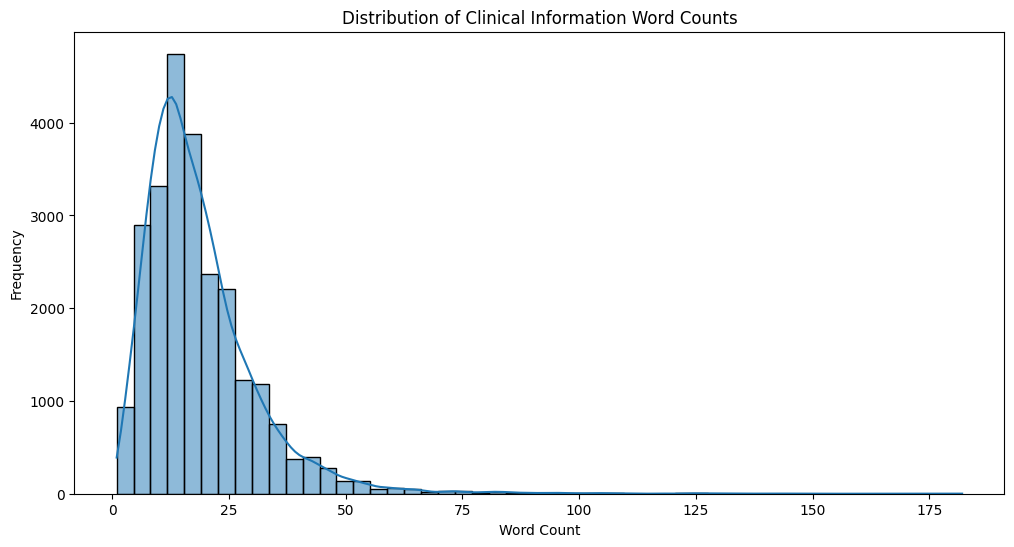

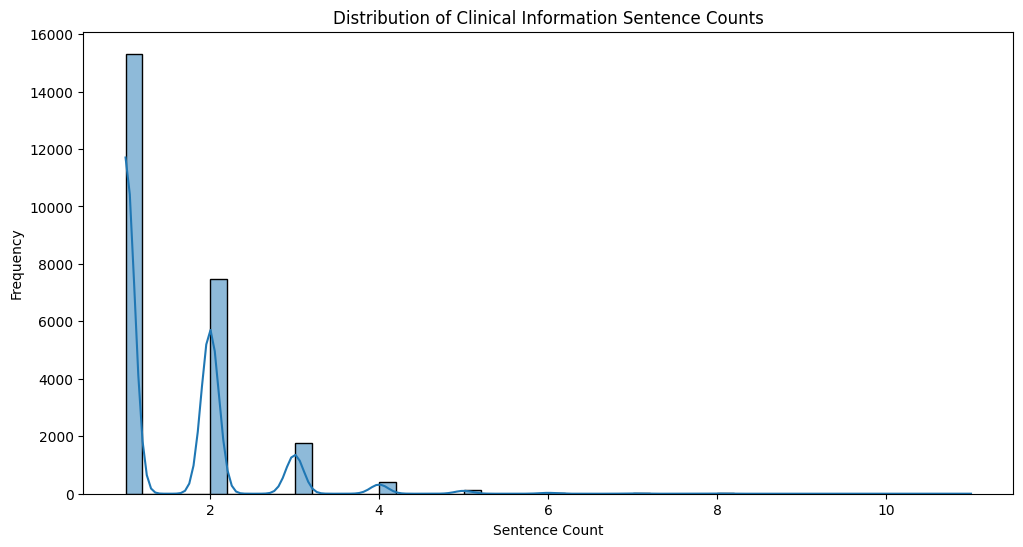

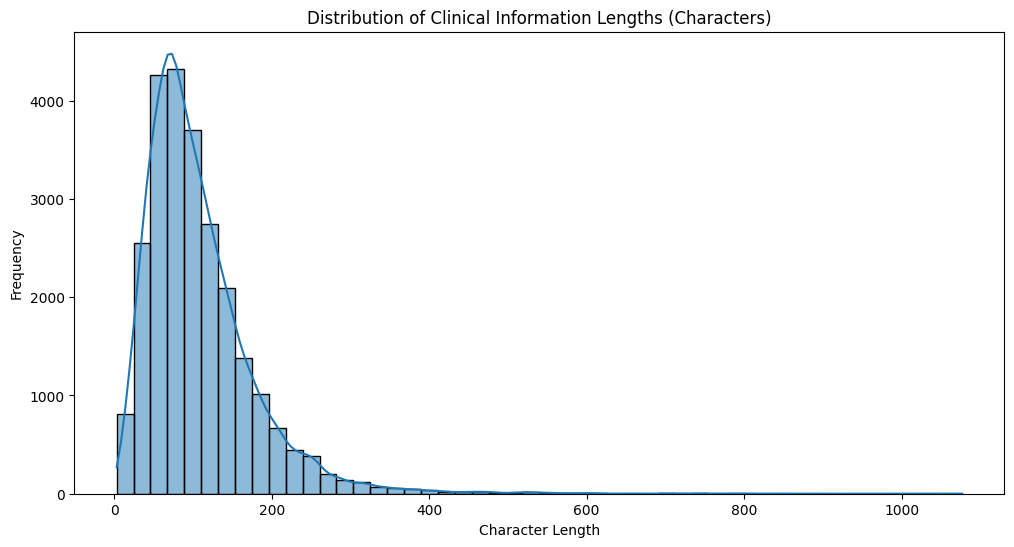


Average Clinical Information Word Count by Modality:
modality
MRI    18.773594
Name: clinical_info_word_count, dtype: float64

Average Clinical Information Sentence Count by Modality:
modality
MRI    1.523594
Name: clinical_info_sentence_count, dtype: float64

Average Clinical Information Character Length by Modality:
modality
MRI    107.530744
Name: clinical_info_length, dtype: float64


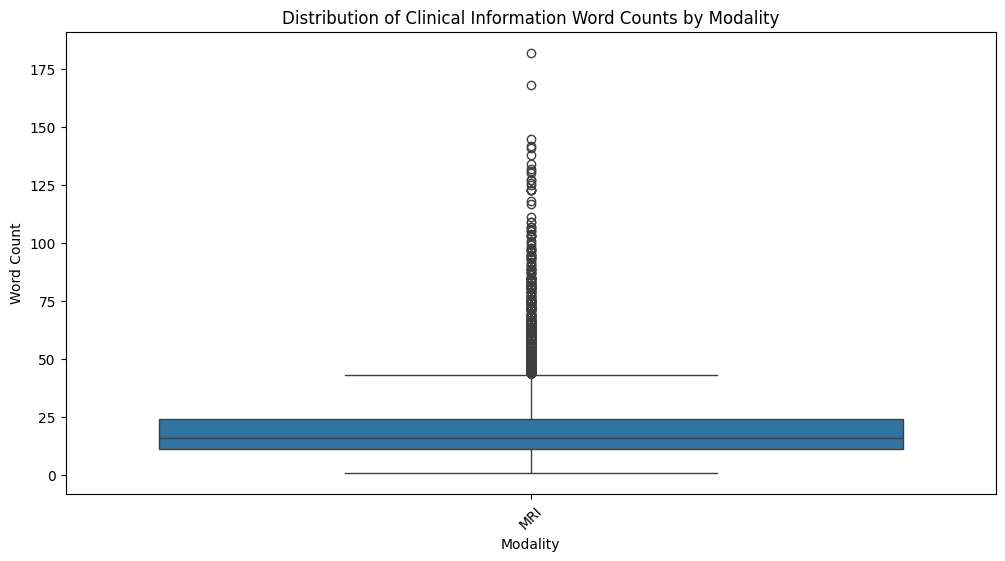

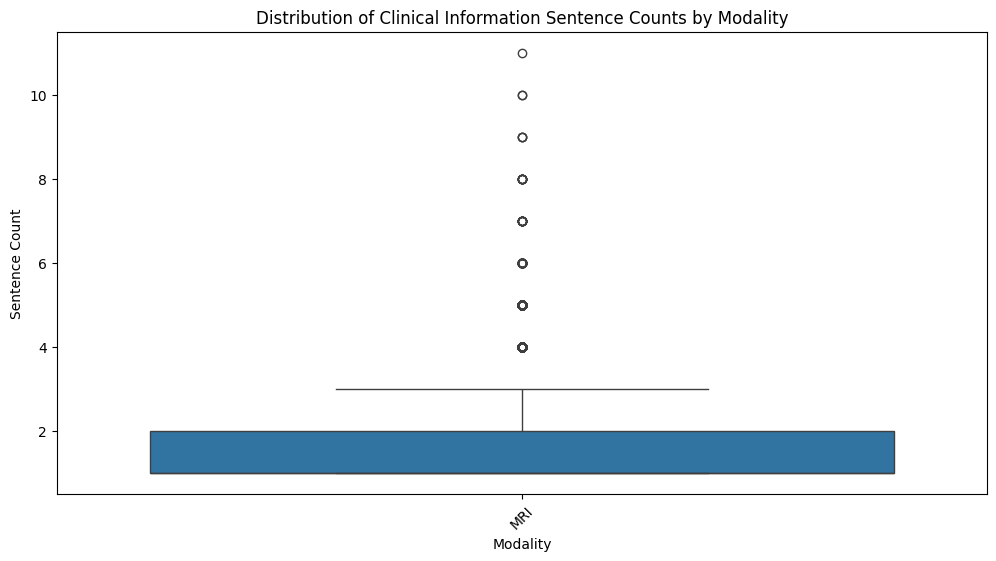

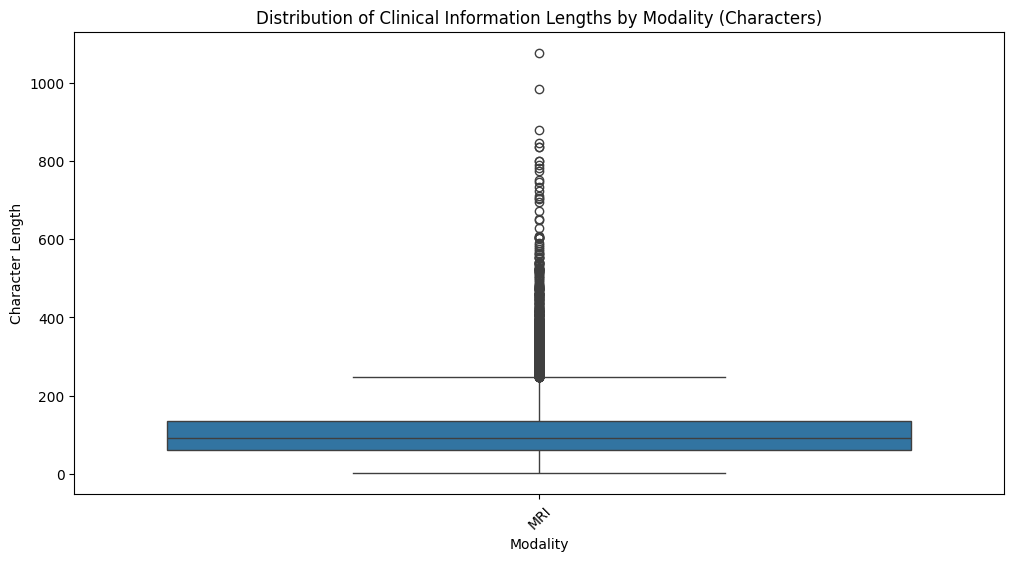

CPU times: user 10.8 s, sys: 928 ms, total: 11.7 s
Wall time: 10.9 s


In [ ]:
%%time
"""
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Download the 'punkt' tokenizer data if it's not already downloaded
nltk.download('punkt', quiet=True)  """


# Calculate word count, sentence count, and character length for each clinical information entry
data['clinical_info_word_count'] = data['clinical_information'].apply(lambda x: len(word_tokenize(x)))
data['clinical_info_sentence_count'] = data['clinical_information'].apply(lambda x: len(sent_tokenize(x)))
data['clinical_info_length'] = data['clinical_information'].str.len()

# Summary statistics for each metric
print("\nClinical Information Character Length Summary:")
print(data['clinical_info_length'].describe())

print("\nClinical Information Word Count Summary:")
print(data['clinical_info_word_count'].describe())

print("\nClinical Information Sentence Count Summary:")
print(data['clinical_info_sentence_count'].describe())

# Visualize the distribution of word count, sentence count, and character length for clinical information

# Histogram of word counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='clinical_info_word_count', bins=50, kde=True)
plt.title('Distribution of Clinical Information Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of sentence counts
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='clinical_info_sentence_count', bins=50, kde=True)
plt.title('Distribution of Clinical Information Sentence Counts')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

# Histogram of character lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='clinical_info_length', bins=50, kde=True)
plt.title('Distribution of Clinical Information Lengths (Characters)')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.show()

# Group by modality and calculate mean lengths for clinical information
modality_avg_word_count = data.groupby('modality')['clinical_info_word_count'].mean().sort_values(ascending=False)
modality_avg_sentence_count = data.groupby('modality')['clinical_info_sentence_count'].mean().sort_values(ascending=False)
modality_avg_char_length = data.groupby('modality')['clinical_info_length'].mean().sort_values(ascending=False)

print("\nAverage Clinical Information Word Count by Modality:")
print(modality_avg_word_count)

print("\nAverage Clinical Information Sentence Count by Modality:")
print(modality_avg_sentence_count)

print("\nAverage Clinical Information Character Length by Modality:")
print(modality_avg_char_length)

# Box plots to compare distribution by modality for clinical information

# Box plot of word count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='clinical_info_word_count')
plt.title('Distribution of Clinical Information Word Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of sentence count by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='clinical_info_sentence_count')
plt.title('Distribution of Clinical Information Sentence Counts by Modality')
plt.xlabel('Modality')
plt.ylabel('Sentence Count')
plt.xticks(rotation=45)
plt.show()

# Box plot of character length by modality
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='modality', y='clinical_info_length')
plt.title('Distribution of Clinical Information Lengths by Modality (Characters)')
plt.xlabel('Modality')
plt.ylabel('Character Length')
plt.xticks(rotation=45)
plt.show()




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25176 entries, 0 to 33899
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    25176 non-null  int64  
 1   clinical_information          25176 non-null  object 
 2   technique                     25176 non-null  object 
 3   findings                      25176 non-null  object 
 4   comparison                    21596 non-null  object 
 5   impression                    25176 non-null  object 
 6   report_id_x                   25176 non-null  object 
 7   join                          25176 non-null  int64  
 8   report_id_y                   25176 non-null  float64
 9   modality                      25176 non-null  object 
 10  instruction                   25176 non-null  object 
 11  impression_word_count         25176 non-null  int64  
 12  impression_sentence_count     25176 non-null  int64  
 13  impres

# Checking outliers
**Output removed to protect Uchicago data**

**Outliers are legtimate information with no issues; hence, the data will be kept for training**

In [ ]:
# Set the maximum width for displayed columns
pd.set_option('display.max_colwidth', None)
# Retrieve 10 sample clinical information entries with character length of 100 or more
long_clinical_info = data[data['clinical_info_word_count'] >= 100]
sample_long_clinical_info = long_clinical_info.sample(n=10, random_state=1)
#print("\nSample Clinical Information Entries with 100+ Characters:")
sample_long_clinical_info['clinical_information']